In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
df = pd.read_csv('./data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
region     1000 non-null int64
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null int64
address    1000 non-null int64
income     1000 non-null float64
ed         1000 non-null int64
employ     1000 non-null int64
retire     1000 non-null float64
gender     1000 non-null int64
reside     1000 non-null int64
custcat    1000 non-null int64
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff65319ac10>]],
      dtype=object)

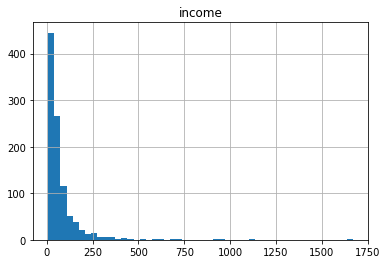

In [7]:
df.hist(column = 'income', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff654475d50>]],
      dtype=object)

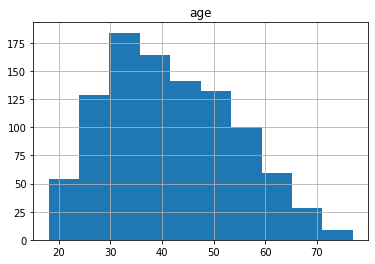

In [27]:
df.hist(column = 'age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff654925c10>]],
      dtype=object)

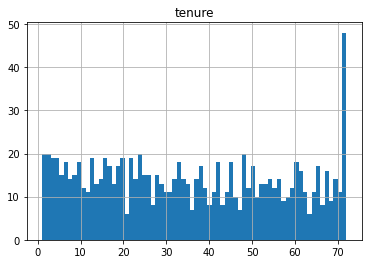

In [30]:
df.hist(column = 'tenure', bins = 70)

In [9]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values

In [10]:
y = df['custcat'].values

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
k = 4
model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [16]:
yhat = model_knn.predict(X_test)

In [22]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5025
Test set Accuracy:  0.34


In [23]:
k = 6
model_knn6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = model_knn6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model_knn6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


In [18]:
import sklearn.metrics as metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1, Ks):
    
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = model_knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])
    
print(mean_acc)
print(std_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


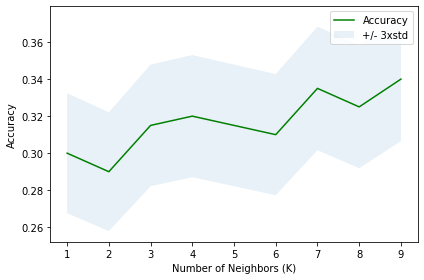

In [19]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc -1 * std_acc, mean_acc + 1 *std_acc, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [21]:
print("The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)

The best accuracy was with 0.34 with k = 9
